In [13]:
import os 
from netCDF4 import Dataset as NetCDFFile
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature
import pickle
import matplotlib as mpl

In [15]:
#nc = NetCDFFile("ensmean_CMIP6_historical_minus_histnat_1985_2014.nc")
nc = NetCDFFile("ensmean_diff_cmip6_yearmax_pr.nc")

lats = nc.variables['lat'][:]
lons = nc.variables['lon'][:]
pr   = nc.variables['pr'][:]
nc.close()
nc = NetCDFFile("enspctl75_diff_cmip6_yearmax_pr.nc")
pr_75   = nc.variables['pr'][:]
nc.close()
nc = NetCDFFile("enspctl25_diff_cmip6_yearmax_pr.nc")
pr_25   = nc.variables['pr'][:]
nc.close()



In [89]:
from mpl_toolkits.basemap import Basemap
# Get some parameters for the Stereographic Projection
#lon_0 = lons.mean()
#lat_0 = lats.mean()
lon_0=73
lat_0=49
m = Basemap(width=7500000,height=5000000,
            resolution='l',projection='stere',\
            lat_ts=49,lat_0=lat_0,lon_0=lon_0)

In [90]:
# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

In [91]:
v =  np.linspace(-0.5,0.5 , 41, endpoint=True)
    #cmap = plt.cm.  # define the colormap
cmap = plt.cm.PuOr
    # extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
#    # force the first color entry to be grey
#    cmaplist[0] = (.5, .5, .5, 1.0)

    # create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)
norm = mpl.colors.BoundaryNorm(v, cmap.N)

<ipython-input-103-9c3bd963e68f>:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cs = m.pcolor(xi,yi,np.squeeze(pr), vmin=-.5, vmax=.5,cmap=cmap, norm=norm)
<ipython-input-103-9c3bd963e68f>:22: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  cs = m.pcolor(xi,yi,np.squeeze(pr), vmin=-.5, vmax=.5,cmap=cmap, norm=norm)


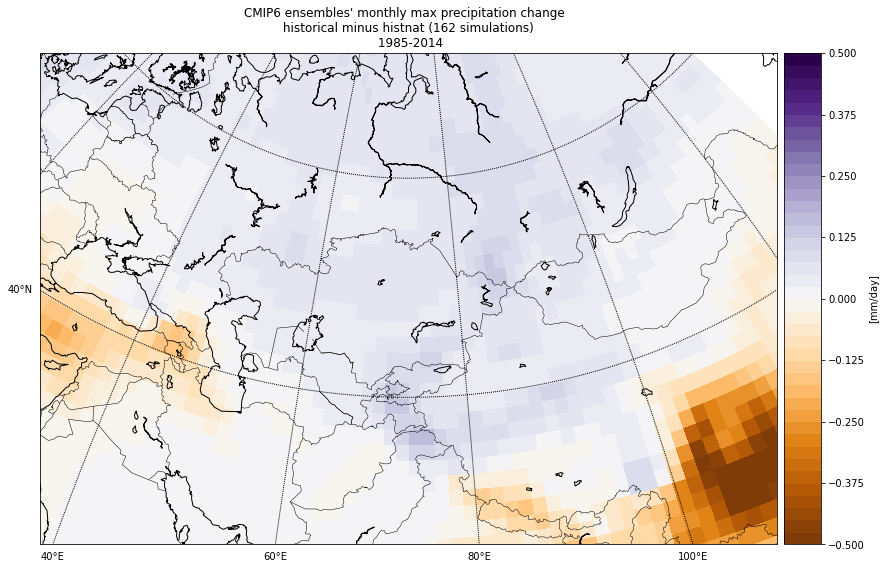

In [103]:
# Plot Data
fig = plt.figure('1')
fig.set_size_inches(14, 10)



#ax = plt.axes()   

#m.drawcoastlines('50m', linewidth=0.8)
#ax.add_feature(cartopy.feature.BORDERS)
#ax.add_feature(cartopy.feature.OCEAN,
#               edgecolor='black', zorder=0,
#               linewidth=0.8, alpha=.7)
#ax.add_feature(cartopy.feature.BORDERS, 
#               edgecolor='black', zorder=0,
#               linewidth=0.8, alpha=.7)
#ax.add_feature(cartopy.feature.LAND, zorder=0,
#               linewidth=0.8, alpha=.7)
#
    

cs = m.pcolor(xi,yi,np.squeeze(pr), vmin=-.5, vmax=.5,cmap=cmap, norm=norm)
# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 20.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 20.), labels=[0,0,0,1], fontsize=10)

## Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()
#
# Add Colorbar
cbar = m.colorbar(cs, location='right', pad="1%")
cbar.set_label("[mm/day]")

# Add Title
plt.title("CMIP6 ensembles' monthly max precipitation change  \n historical minus histnat (162 simulations) \n 1985-2014")
plt.savefig("CMIP6_ensmean_historical_minus_histnat_monmax.png", bbox_inches='tight')
plt.show()

<ipython-input-104-dc09528c7538>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cs = m.pcolor(xi,yi,np.squeeze(pr_25), vmin=-.5, vmax=.5,cmap=cmap, norm=norm)
<ipython-input-104-dc09528c7538>:4: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  cs = m.pcolor(xi,yi,np.squeeze(pr_25), vmin=-.5, vmax=.5,cmap=cmap, norm=norm)


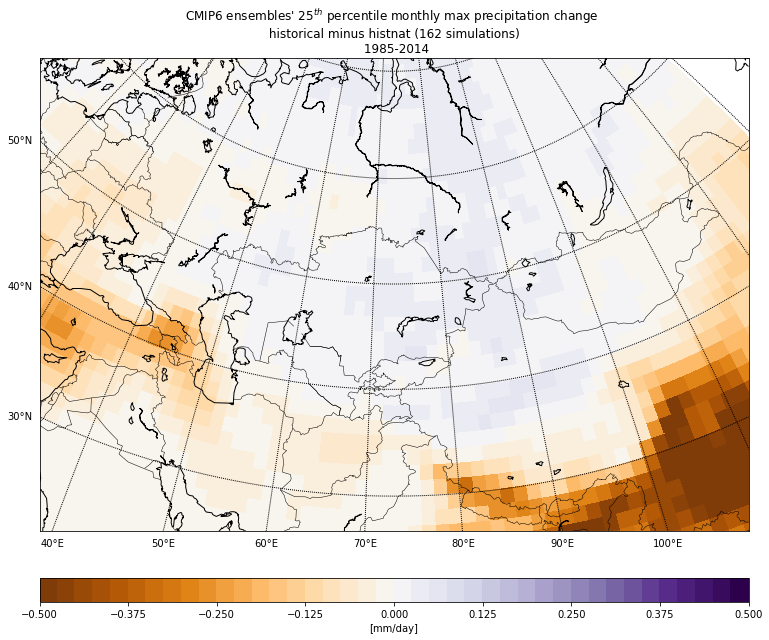

In [104]:
# Plot Data
fig = plt.figure('1')
fig.set_size_inches(14, 10)
cs = m.pcolor(xi,yi,np.squeeze(pr_25), vmin=-.5, vmax=.5,cmap=cmap, norm=norm)

#m.plot(xi[(pr<pr_75) ],yi[(pr<pr_75) ],'k.')
# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label("[mm/day]")

# Add Title
plt.title("CMIP6 ensembles' $25^{th}$ percentile monthly max precipitation change  \n historical minus histnat (162 simulations) \n 1985-2014")
plt.savefig("CMIP6_enspctl25_historical_minus_histnat_monmax.png", bbox_inches='tight')

plt.show()

<ipython-input-26-5c515102c6d3>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cs = m.pcolor(xi,yi,np.squeeze(pr_75), vmin=-.5, vmax=.5,cmap=cmap, norm=norm)
<ipython-input-26-5c515102c6d3>:4: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  cs = m.pcolor(xi,yi,np.squeeze(pr_75), vmin=-.5, vmax=.5,cmap=cmap, norm=norm)


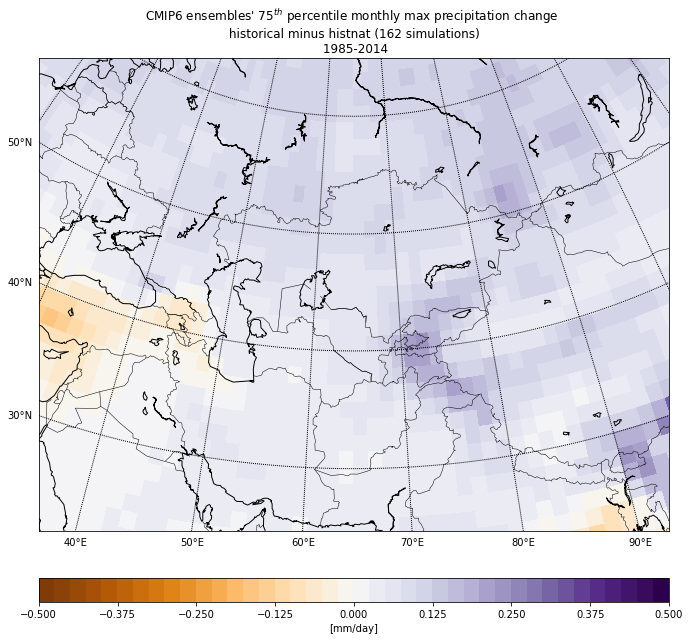

In [26]:
# Plot Data
fig = plt.figure('1')
fig.set_size_inches(14, 10)
cs = m.pcolor(xi,yi,np.squeeze(pr_75), vmin=-.5, vmax=.5,cmap=cmap, norm=norm)

#m.plot(xi[(pr<pr_75) ],yi[(pr<pr_75) ],'k.')
# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label("[mm/day]")

# Add Title
plt.title("CMIP6 ensembles' $75^{th}$ percentile monthly max precipitation change  \n historical minus histnat (162 simulations) \n 1985-2014")
plt.savefig("CMIP6_enspctl75_historical_minus_histnat_monmax.png", bbox_inches='tight')

plt.show()